In [129]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier

In [130]:
data = pd.read_csv("churn.csv")

In [131]:
data

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False.
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False.
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False.
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False.


In [132]:
data.isna().sum()

State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
dtype: int64

In [133]:
data = data.rename(columns={'Churn?':'Churn'})

In [134]:
data.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn'],
      dtype='object')

In [135]:
data['Churn'].value_counts()

False.    2850
True.      483
Name: Churn, dtype: int64

In [136]:
data['Churn'] = data['Churn'].replace({'False.':0,'True.':1 })

In [137]:
data['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [138]:
data.corr()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
Account Length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area Code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
VMail Message,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Day Mins,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Day Calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Day Charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Eve Mins,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Eve Calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
Eve Charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
Night Mins,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


In [139]:
import seaborn
import matplotlib.pyplot as plt

<AxesSubplot:>

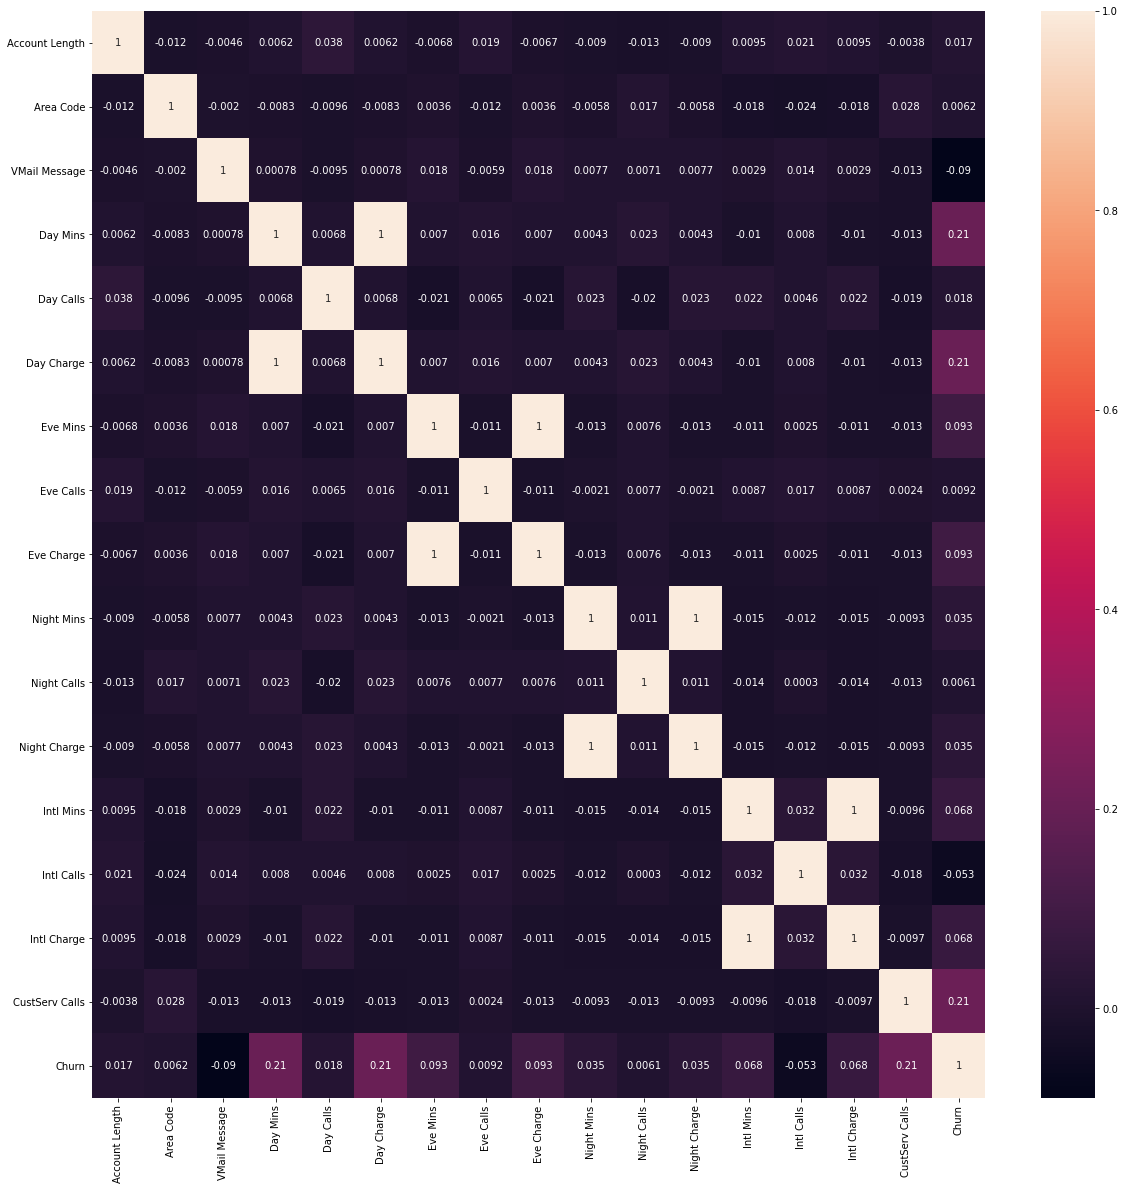

In [140]:
plt.figure(figsize=(20,20))
seaborn.heatmap(data.corr(), annot=True)

In [141]:
del data['Night Charge']

<AxesSubplot:>

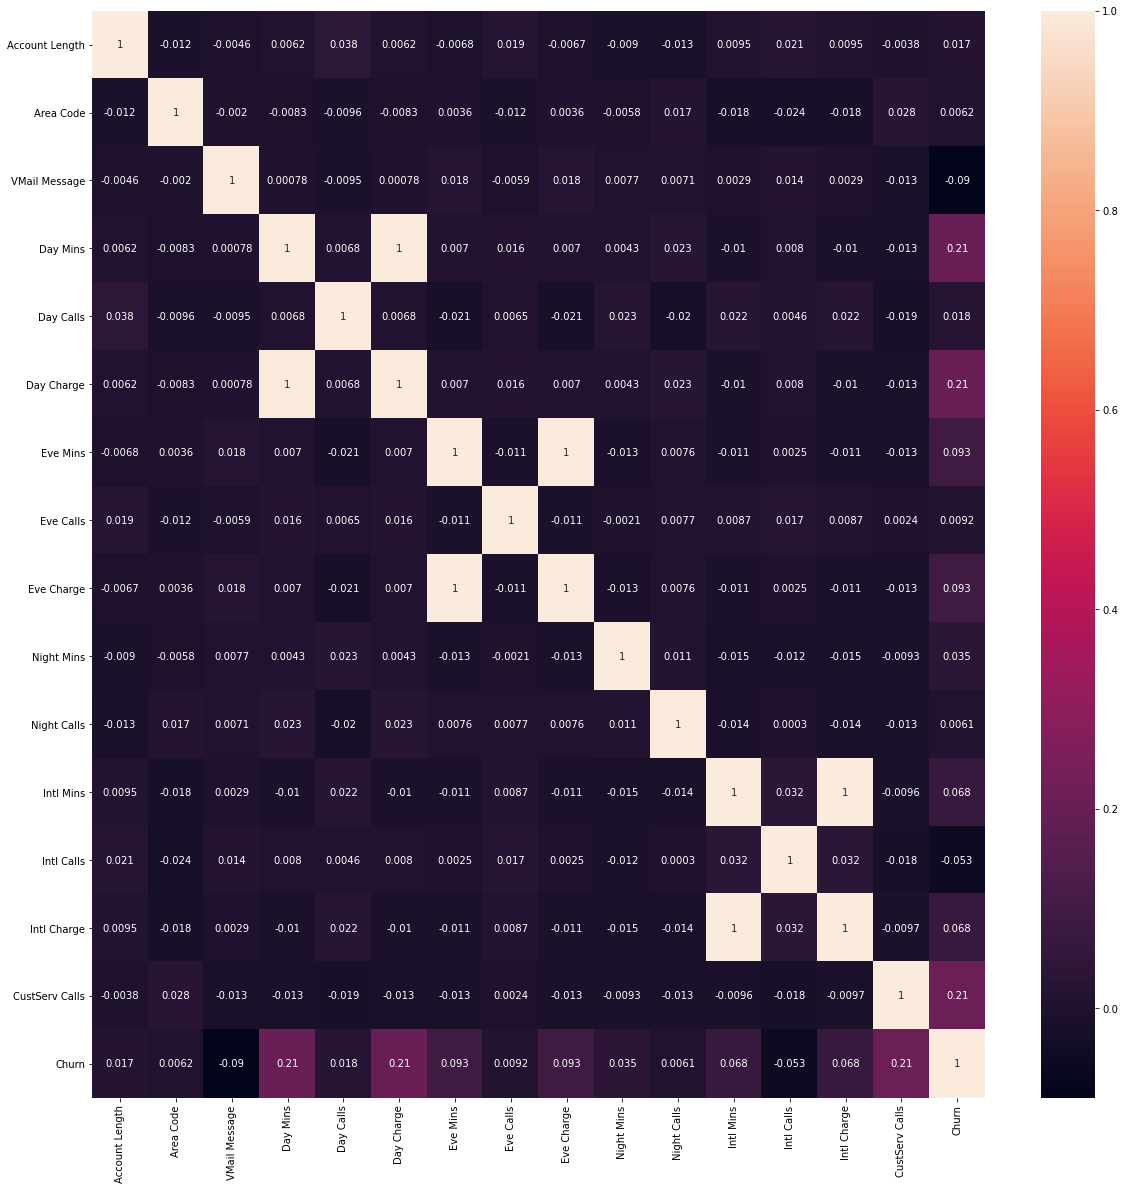

In [142]:
plt.figure(figsize=(20,20))
seaborn.heatmap(data.corr(), annot=True)

In [143]:
del data['Intl Charge']

<AxesSubplot:>

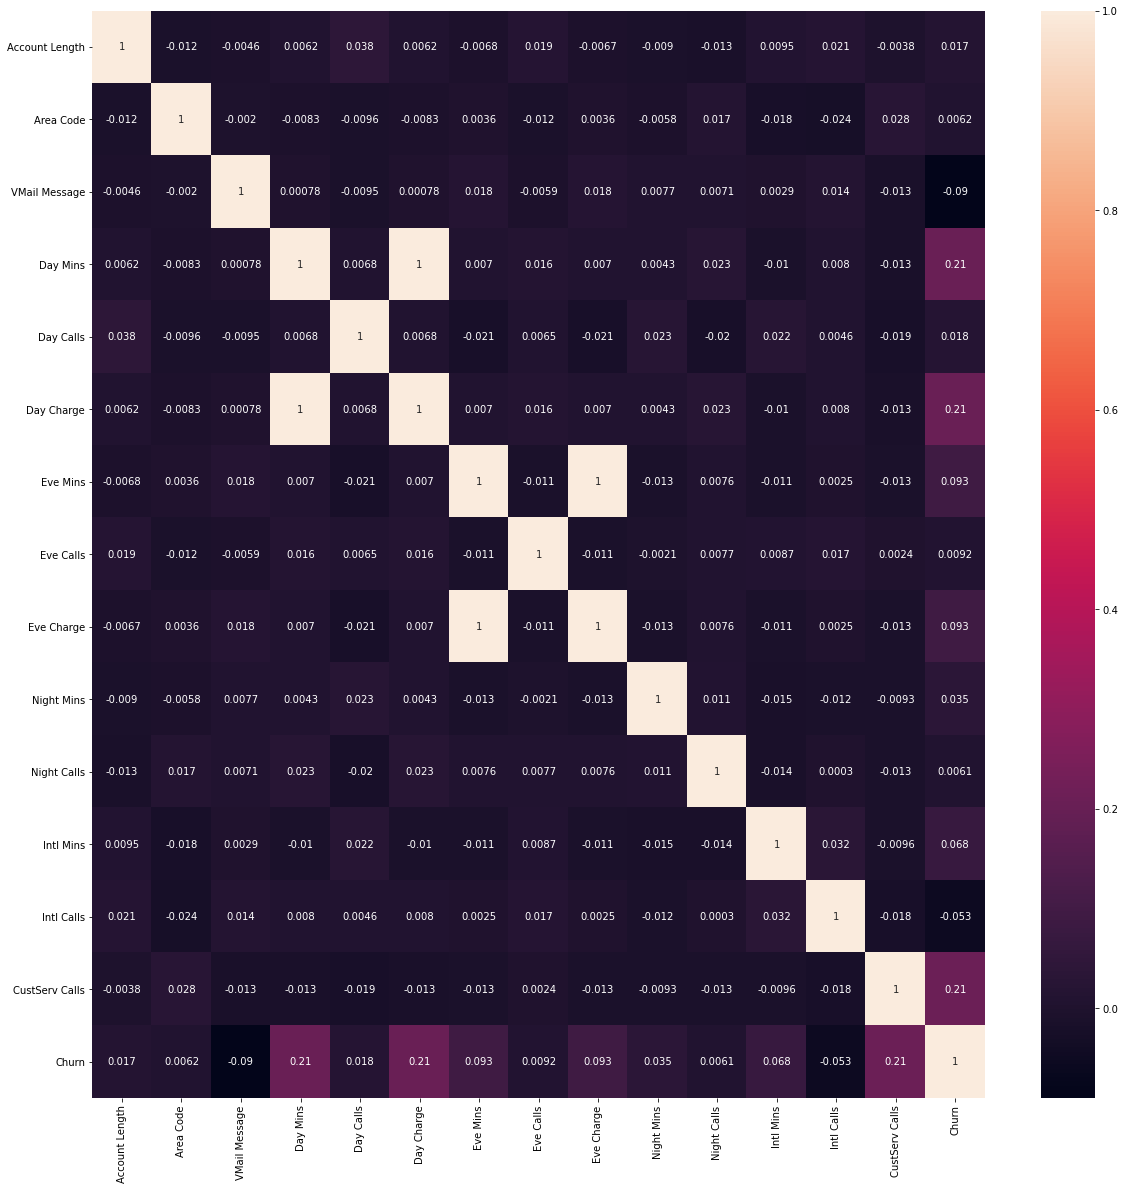

In [144]:
plt.figure(figsize=(20,20))
seaborn.heatmap(data.corr(), annot=True)

In [145]:
del data['Eve Charge']

<AxesSubplot:>

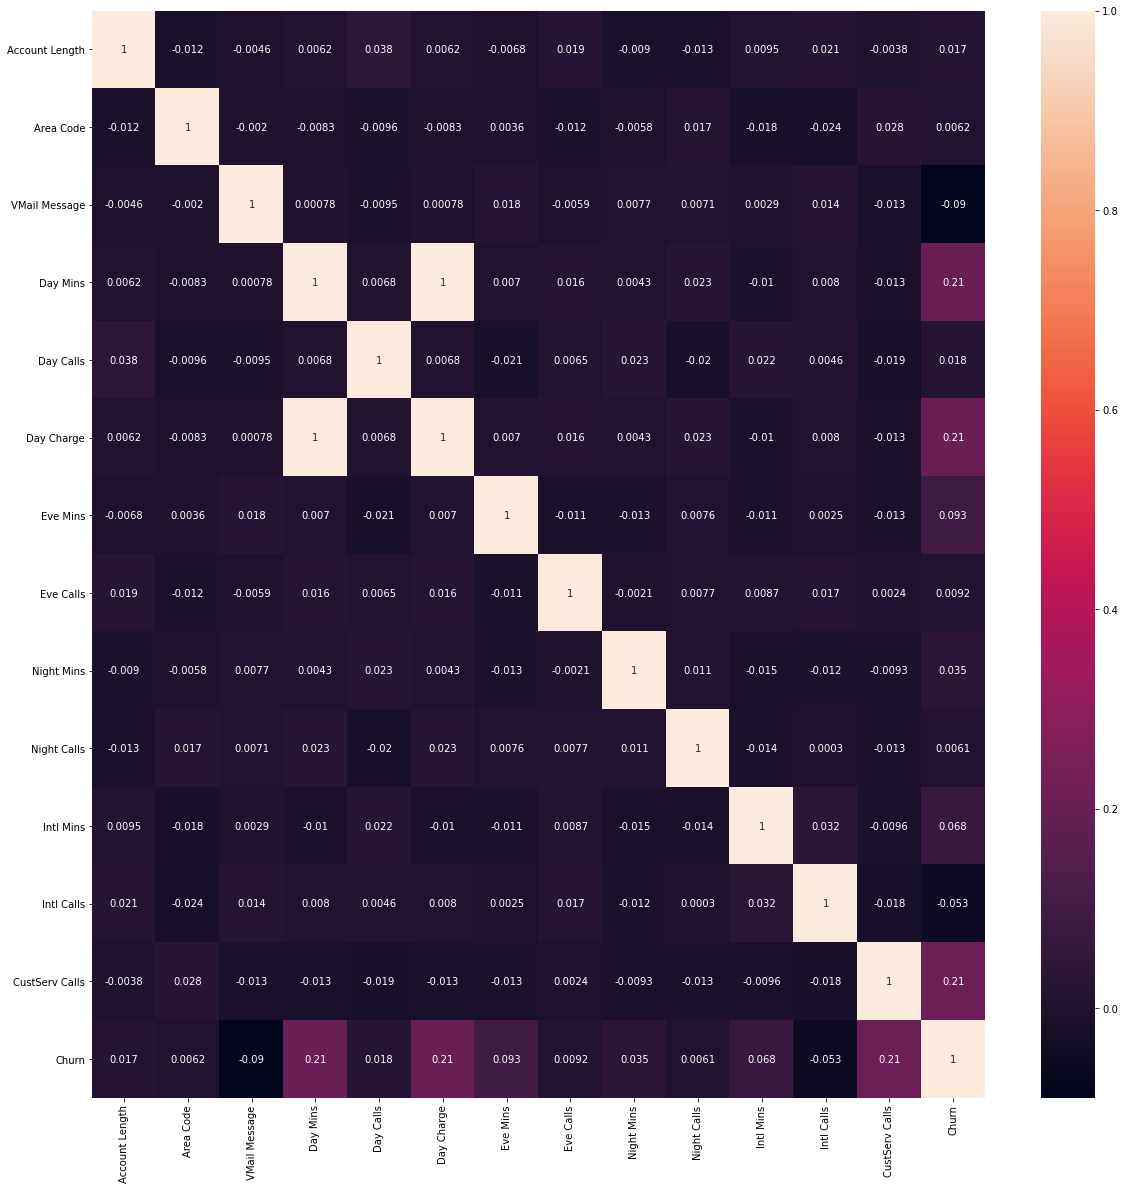

In [146]:
plt.figure(figsize=(20,20))
seaborn.heatmap(data.corr(), annot=True)

<AxesSubplot:>

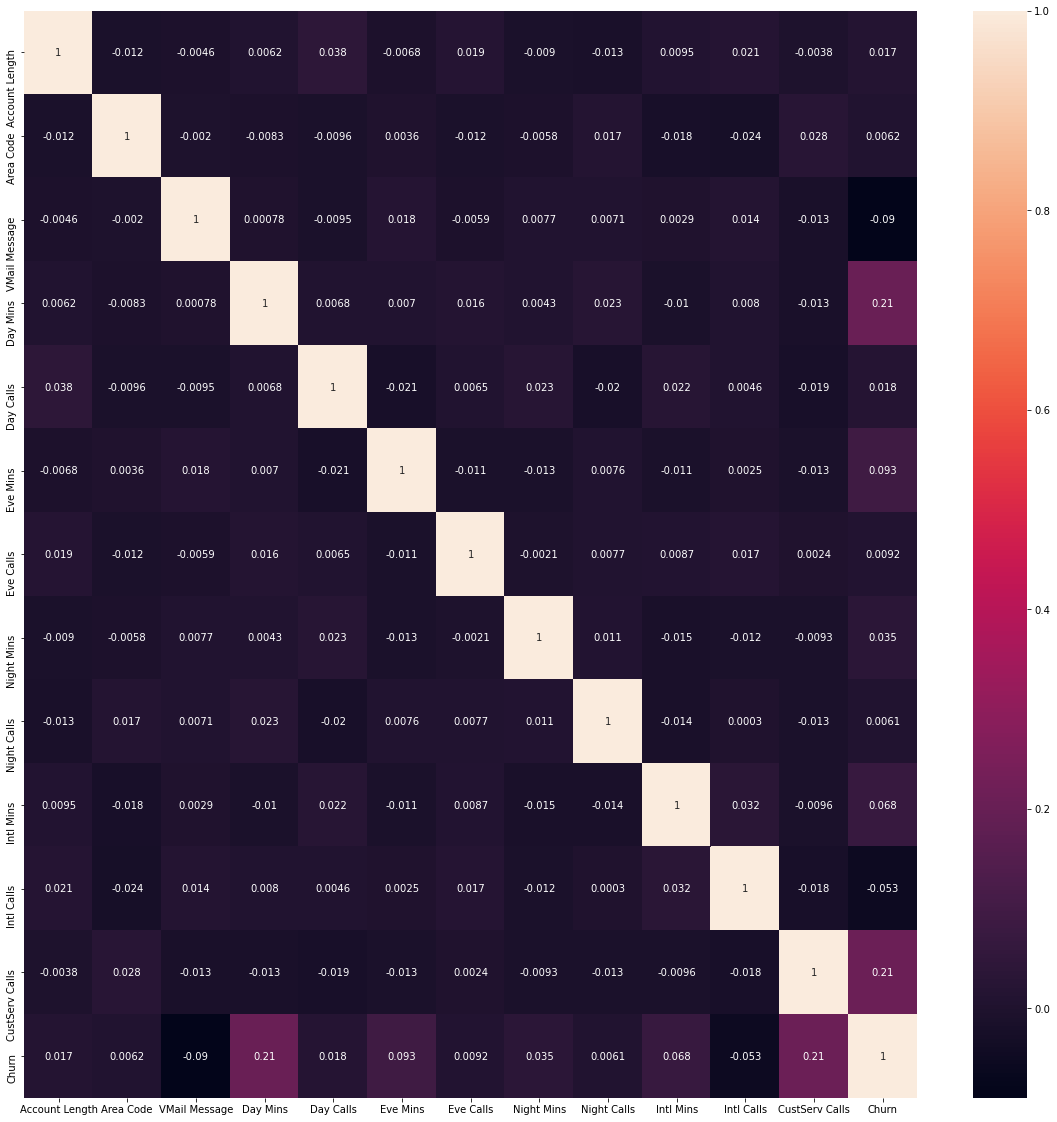

In [147]:
del data['Day Charge']

plt.figure(figsize=(20,20))
seaborn.heatmap(data.corr(), annot=True)

In [148]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0


In [149]:
del data['Phone']

In [150]:
data.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,CustServ Calls,Churn
0,KS,128,415,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,OH,107,415,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,NJ,137,415,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,OH,84,408,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,OK,75,415,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0


In [151]:
data['State'].nunique()

51

In [152]:
data['Area Code'].nunique()

3

In [153]:
data['Account Length'].nunique()

212

In [154]:
data['VMail Plan'].value_counts()

no     2411
yes     922
Name: VMail Plan, dtype: int64

In [155]:
del data['State']

In [156]:
area_code = pd.get_dummies(data['Area Code'])

In [157]:
del data['Area Code']

In [158]:
data = pd.concat([data,area_code], axis=1)

In [159]:
data[["Int'l Plan", "VMail Plan"]] = data[["Int'l Plan", "VMail Plan"]].replace({'no':0, 'yes':1})

In [160]:
data

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,CustServ Calls,Churn,408,415,510
0,128,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0,0,1,0
1,107,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0,0,1,0
2,137,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0,0,1,0
3,84,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0,1,0,0
4,75,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,1,36,156.2,77,215.5,126,279.1,83,9.9,6,2,0,0,1,0
3329,68,0,0,0,231.1,57,153.4,55,191.3,123,9.6,4,3,0,0,1,0
3330,28,0,0,0,180.8,109,288.8,58,191.9,91,14.1,6,2,0,0,0,1
3331,184,1,0,0,213.8,105,159.6,84,139.2,137,5.0,10,2,0,0,0,1


<AxesSubplot:>

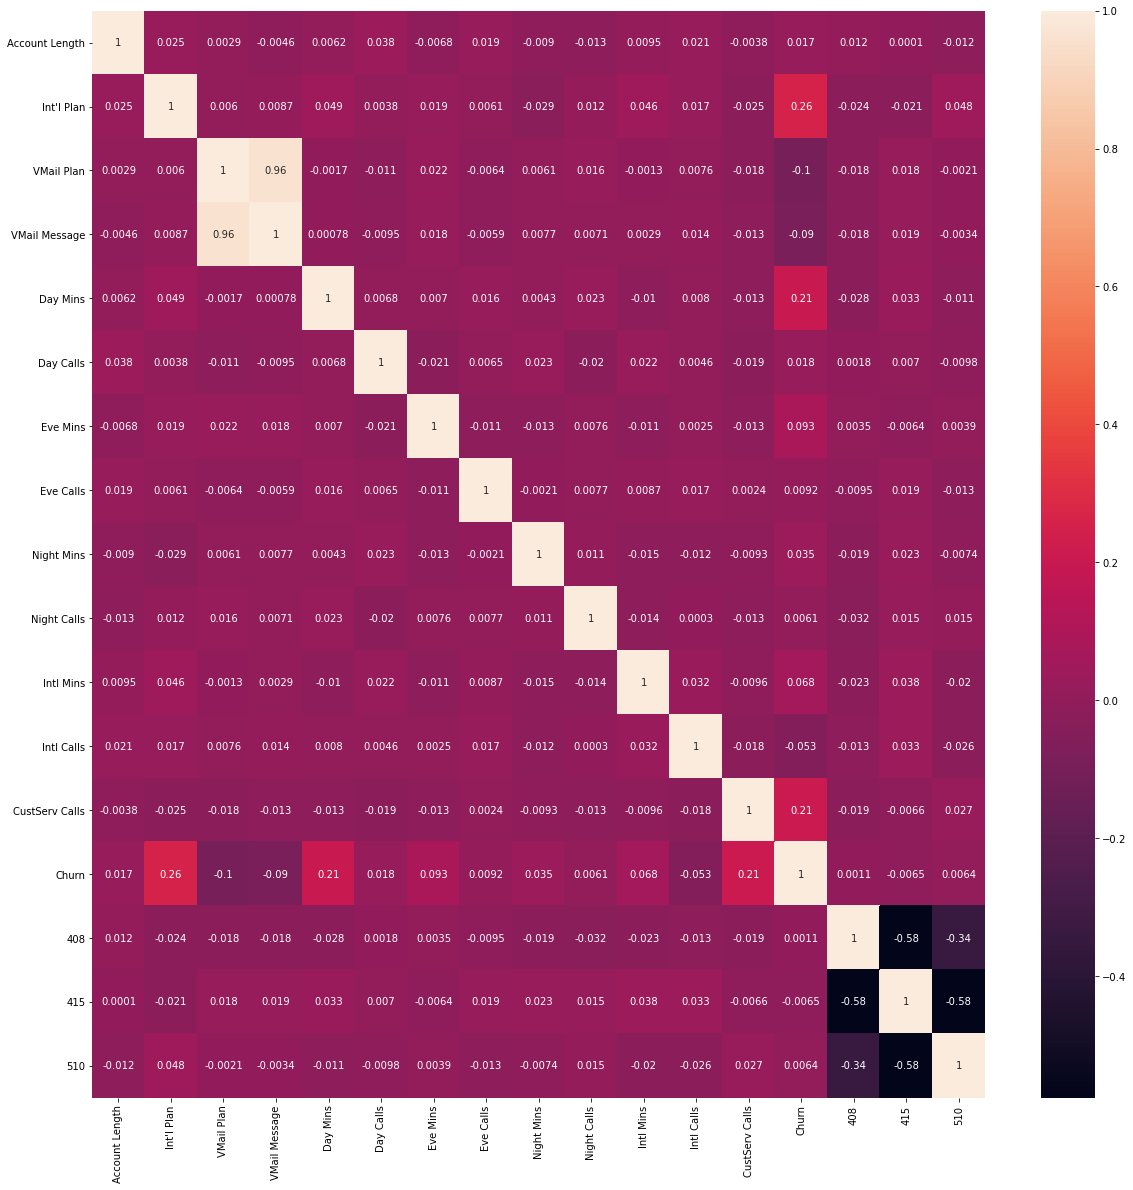

In [161]:
plt.figure(figsize=(20,20))
seaborn.heatmap(data.corr(), annot=True)

In [162]:
data['Domestic Min'] = data['Day Mins']+data['Night Mins']+data['Eve Mins']

<AxesSubplot:>

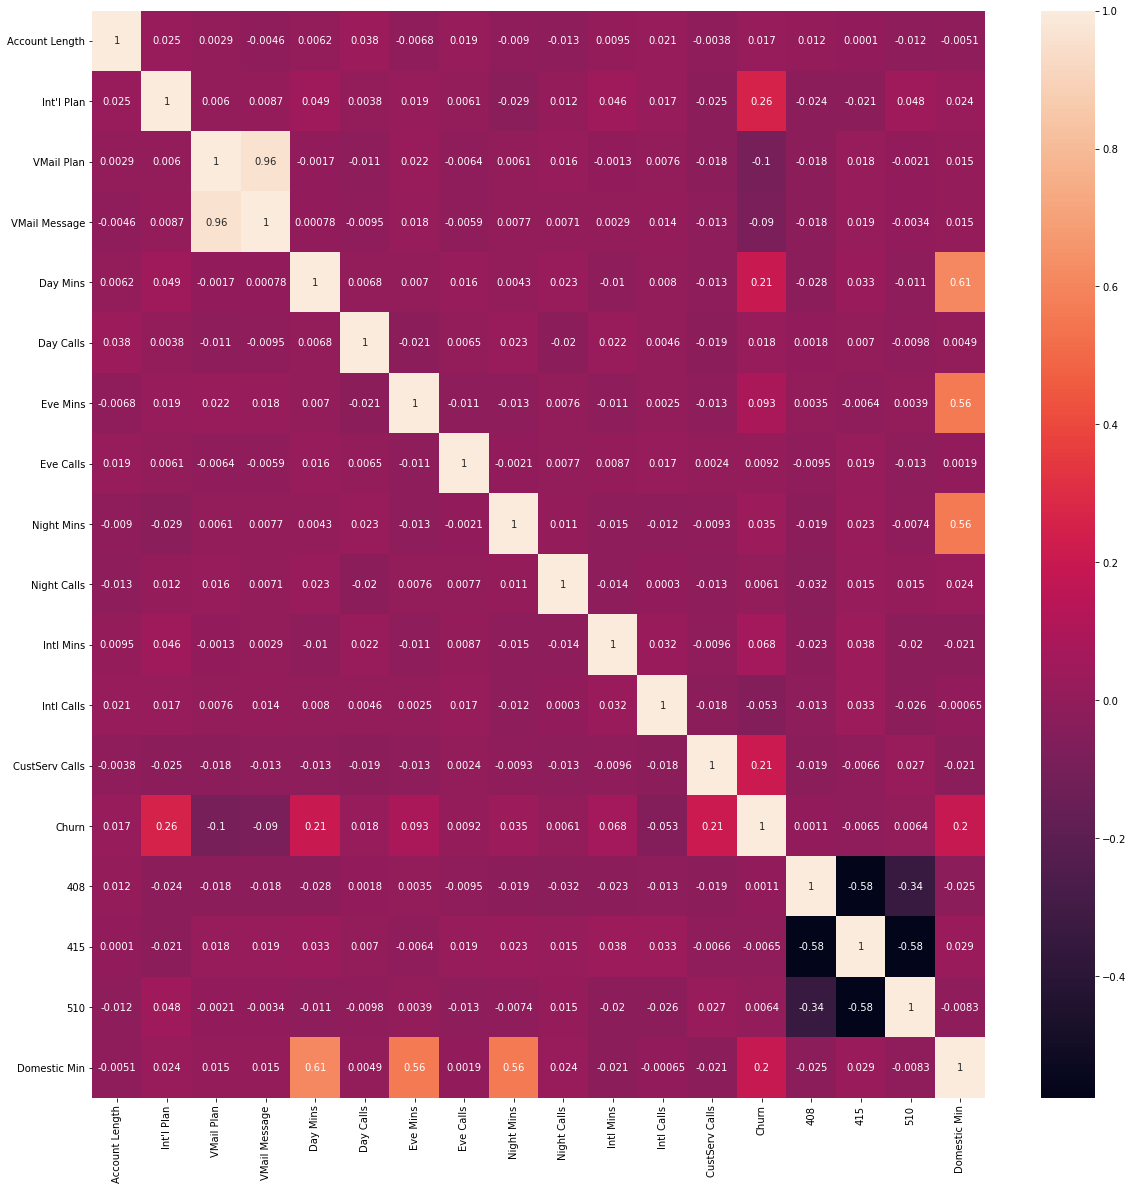

In [163]:
plt.figure(figsize=(20,20))
seaborn.heatmap(data.corr(), annot=True)

In [164]:
X = data.drop(columns='Churn')

In [165]:
y = data['Churn']

In [59]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2)

In [73]:
def model_fit(model, train_X, test_X, train_y, test_y):
    model.fit(train_X, train_y)
    train_pred = model.predict(train_X)
    test_pred = model.predict(test_X)
    train_acc = accuracy_score(train_y, train_pred )
    test_acc = accuracy_score(test_y, test_pred )
    print(model)
    print("Train Accuracy = ", train_acc)
    print("Test Accuracy = ", test_acc)
    return train_acc, test_acc

In [83]:
run_model = [LogisticRegression(penalty='none'), LogisticRegression(penalty = 'l1', solver='saga'), LogisticRegression(penalty='l2'),
            LogisticRegression(penalty='elasticnet',l1_ratio=0.5, solver='saga' ),KNeighborsClassifier(n_neighbors=5),SVC(),
            DecisionTreeClassifier(), RandomForestClassifier(bootstrap='False'), AdaBoostClassifier(),
            GradientBoostingClassifier()]

model_name = ['LogisticRegression', 'Lasso', 'Ridge',
            'Elasticnet','KNeighborsClassifier','SVM',
            'DecisionTreeClassifier', 'RandomForestClassifier', 'AdaBoostClassifier',
            'GradientBoostingClassifier']

In [118]:
train_acc = []
test_acc = []
for i in run_model:
    trainacc, testacc = model_fit(i, train_X, test_X, train_y, test_y)
    train_acc.append(trainacc)
    test_acc.append(testacc)


/Users/noordeen/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/noordeen/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/noordeen/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_

LogisticRegression(penalty='none')
Train Accuracy =  0.8578394598649662
Test Accuracy =  0.8425787106446777
LogisticRegression(penalty='l1', solver='saga')
Train Accuracy =  0.859714928732183
Test Accuracy =  0.8455772113943029
LogisticRegression()
Train Accuracy =  0.858589647411853
Test Accuracy =  0.8380809595202399


/Users/noordeen/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')
Train Accuracy =  0.859714928732183
Test Accuracy =  0.8455772113943029
KNeighborsClassifier()
Train Accuracy =  0.8987246811702926
Test Accuracy =  0.8740629685157422
SVC()
Train Accuracy =  0.8574643660915229
Test Accuracy =  0.8455772113943029
DecisionTreeClassifier()
Train Accuracy =  1.0
Test Accuracy =  0.9175412293853074
RandomForestClassifier(bootstrap='False')
Train Accuracy =  1.0
Test Accuracy =  0.9505247376311844
AdaBoostClassifier()
Train Accuracy =  0.9024756189047262
Test Accuracy =  0.8755622188905547
GradientBoostingClassifier()
Train Accuracy =  0.9797449362340586
Test Accuracy =  0.9505247376311844


In [85]:
model_name

['LogisticRegression',
 'Lasso',
 'Ridge',
 'Elasticnet',
 'KNeighborsClassifier',
 'SVM',
 'DecisionTreeClassifier',
 'RandomForestClassifier',
 'AdaBoostClassifier',
 'GradientBoostingClassifier']

In [89]:
pd.DataFrame([train_acc,test_acc],columns=model_name).T

,0,1
LogisticRegression,0.857839,0.842579
Lasso,0.859715,0.845577
Ridge,0.858590,0.838081
Elasticnet,0.859715,0.845577
KNeighborsClassifier,0.898725,0.874063
SVM,0.857464,0.845577
DecisionTreeClassifier,1.000000,0.931034
RandomForestClassifier,1.000000,0.950525
AdaBoostClassifier,0.902476,0.875562
GradientBoostingClassifier,0.979745,0.950525


In [204]:
clf1 = DecisionTreeClassifier()
clf2 = RandomForestClassifier()
clf3 = GradientBoostingClassifier()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

In [205]:
eclf1.fit(train_X, train_y)

VotingClassifier(estimators=[('lr', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('gnb', GradientBoostingClassifier())])

In [206]:
train_pred = eclf1.predict(train_X)
test_pred = eclf1.predict(test_X)
train_acc = accuracy_score(train_y, train_pred )
test_acc = accuracy_score(test_y, test_pred )
print(eclf1)
print("Train Accuracy = ", train_acc)
print("Test Accuracy = ", test_acc)

VotingClassifier(estimators=[('lr', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('gnb', GradientBoostingClassifier())])
Train Accuracy =  1.0
Test Accuracy =  0.9550224887556222


In [196]:
import sklearn

In [197]:
sklearn.__version__

'0.24.1'

In [121]:
from sklearn.ensemble import StackingClassifier
estimators = [ ('lr', clf1), ('rf', clf2), ('gnb', clf3)]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(train_X, train_y)

StackingClassifier(estimators=[('lr', DecisionTreeClassifier()),
                               ('rf', RandomForestClassifier()),
                               ('gnb', GradientBoostingClassifier())],
                   final_estimator=LogisticRegression())

In [122]:
train_pred = clf.predict(train_X)
test_pred = clf.predict(test_X)
train_acc = accuracy_score(train_y, train_pred )
test_acc = accuracy_score(test_y, test_pred )
print(clf)
print("Train Accuracy = ", train_acc)
print("Test Accuracy = ", test_acc)

StackingClassifier(estimators=[('lr', DecisionTreeClassifier()),
                               ('rf', RandomForestClassifier()),
                               ('gnb', GradientBoostingClassifier())],
                   final_estimator=LogisticRegression())
Train Accuracy =  0.986496624156039
Test Accuracy =  0.9565217391304348


In [123]:
#Feature Importance

In [124]:
random = RandomForestClassifier()

In [167]:
random.fit(X,y)

RandomForestClassifier()

In [168]:
X

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,CustServ Calls,408,415,510,Domestic Min
0,128,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0,1,0,707.2
1,107,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0,1,0,611.5
2,137,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0,1,0,527.2
3,84,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,1,0,0,558.2
4,75,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0,1,0,501.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,1,36,156.2,77,215.5,126,279.1,83,9.9,6,2,0,1,0,650.8
3329,68,0,0,0,231.1,57,153.4,55,191.3,123,9.6,4,3,0,1,0,575.8
3330,28,0,0,0,180.8,109,288.8,58,191.9,91,14.1,6,2,0,0,1,661.5
3331,184,1,0,0,213.8,105,159.6,84,139.2,137,5.0,10,2,0,0,1,512.6


In [169]:
random.feature_importances_

array([0.03727203, 0.08461595, 0.02490833, 0.03300561, 0.185324  ,
       0.03739102, 0.06007859, 0.03309272, 0.04968594, 0.03356303,
       0.06575129, 0.0587386 , 0.11662708, 0.00516644, 0.00463154,
       0.00495954, 0.16518829])

In [180]:
best_column = pd.Series(random.feature_importances_,index=X.columns).sort_values(ascending=False).index

In [183]:
col = best_column[:10]

In [192]:
best_column

Index([      'Day Mins',   'Domestic Min', 'CustServ Calls',     'Int'l Plan',
            'Intl Mins',       'Eve Mins',     'Intl Calls',     'Night Mins',
            'Day Calls', 'Account Length',    'Night Calls',      'Eve Calls',
        'VMail Message',     'VMail Plan',              408,              510,
                    415],
      dtype='object')

In [184]:
X[col]

,Day Mins,Domestic Min,CustServ Calls,Int'l Plan,Intl Mins,Eve Mins,Intl Calls,Night Mins,Day Calls,Account Length
0,265.1,707.2,1,0,10.0,197.4,3,244.7,110,128
1,161.6,611.5,1,0,13.7,195.5,3,254.4,123,107
2,243.4,527.2,0,0,12.2,121.2,5,162.6,114,137
3,299.4,558.2,2,1,6.6,61.9,7,196.9,71,84
4,166.7,501.9,3,1,10.1,148.3,3,186.9,113,75
...,...,...,...,...,...,...,...,...,...,...
3328,156.2,650.8,2,0,9.9,215.5,6,279.1,77,192
3329,231.1,575.8,3,0,9.6,153.4,4,191.3,57,68
3330,180.8,661.5,2,0,14.1,288.8,6,191.9,109,28
3331,213.8,512.6,2,1,5.0,159.6,10,139.2,105,184


In [188]:
random.fit(X[col], y)

RandomForestClassifier()

In [190]:
train_pred = random.predict(train_X[col])
test_pred = random.predict(test_X[col])
train_acc = accuracy_score(train_y, train_pred )
test_acc = accuracy_score(test_y, test_pred )
print(random)
print("Train Accuracy = ", train_acc)
print("Test Accuracy = ", test_acc)

RandomForestClassifier()
Train Accuracy =  1.0
Test Accuracy =  1.0
